# OASIS INFOBYTE ML INTERNSHIP

### TASK 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING
BY SATTWIKEE GHOSH

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
data=files.upload()

Saving spam.csv to spam.csv


In [9]:
df=pd.read_csv('spam.csv',encoding = "ISO-8859-1")

### **Data exploration**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [15]:
# missing values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### **Data Cleaning**

In [16]:
# Dropping the unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Renaming the v1 and v2 colums
df.rename(columns={'v1':'Category','v2':'MessageContent'},inplace=True)
df.sample(5)

,Category,MessageContent
4719,ham,Forgot to tell Ì_ smth.. Can Ì_ like number th...
211,ham,Home so we can always chat
4122,ham,"Cool, want me to go to kappa or should I meet ..."
4206,ham,"Lets use it next week, princess :)"
2191,ham,Thankyou so much for the call. I appreciate yo...


In [19]:
# Encoding categorical feature "Target" by converting categorical variables into numerical form.Here we take ham=0 and spam=1

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['Category'] = encoder.fit_transform(df['Category'])

In [22]:
df.sample(3)

,Category,MessageContent
1421,0,Do you work all this week ?
3601,0,Cps is causing the outages to conserve energy.
5132,0,it's still not working. And this time i also t...


In [23]:
df.duplicated().sum()

403

In [24]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

In [27]:
# Using NLTK (Natural Language Toolkit) to count the number of characters, words and sentences for the text message content

In [28]:
import nltk
!pip install nltk
nltk.download('punkt')
import nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
# Calculating The Number Of Characters
df['No.of_Characters'] = df['MessageContent'].apply(len)

# Calculating The Number Of Words
df['No.of_Words'] = df['MessageContent'].apply(lambda x:len(nltk.word_tokenize(x)))

# Calculating The Number Of Sentences
df['No.of_Sentences'] = df['MessageContent'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Category,MessageContent,No.of_Characters,No.of_Words,No.of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Data Visualisation

Label distribution (%): 0    87.4
1    12.6
Name: Category, dtype: float64


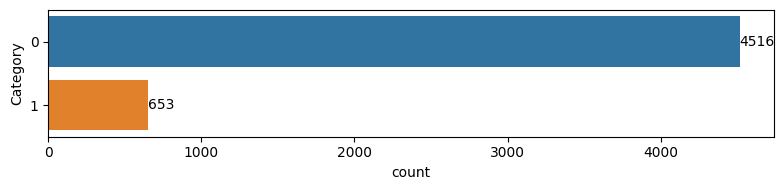

In [31]:
# Plotting a barplot on the count of each category of mail

import seaborn as sns

print('Label distribution (%):', round(df.Category.value_counts(normalize=True),3)*100)
plt.figure(figsize=(8,2))
ax=sns.countplot(data=df, y='Category',)
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()

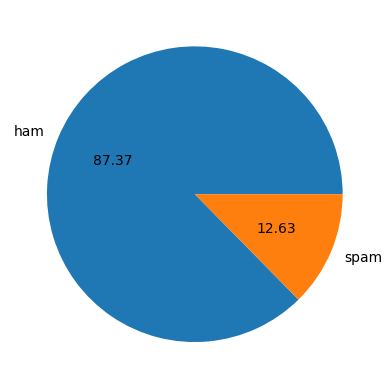

In [32]:
# Pie chart

plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [33]:
# Plotting a histogram of text length
import plotly.express as px
fig = px.histogram(df, x='No.of_Characters', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

<Axes: xlabel='No.of_Characters', ylabel='Count'>

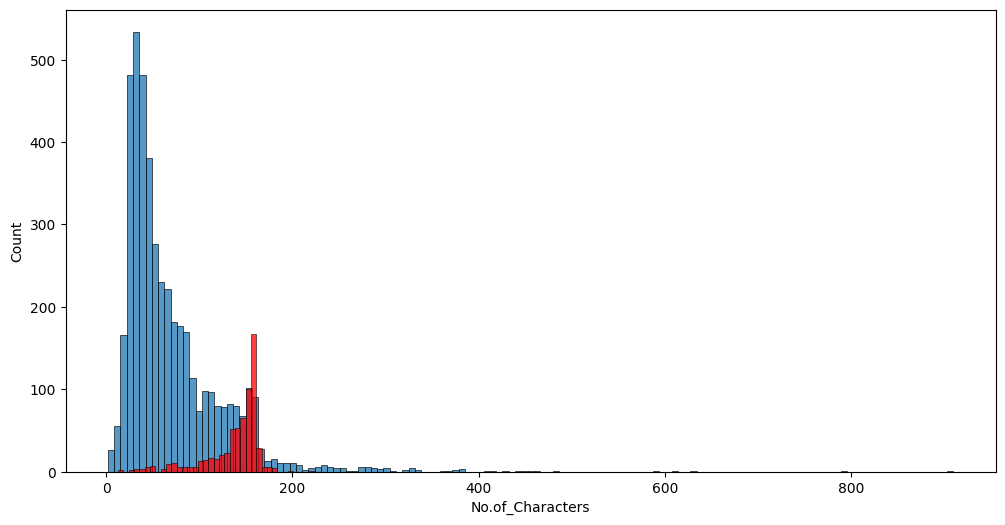

In [34]:
# Histogram of no. of characters by category
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['No.of_Characters'])
sns.histplot(df[df['Category'] == 1]['No.of_Characters'],color='red')

<Axes: xlabel='No.of_Words', ylabel='Count'>

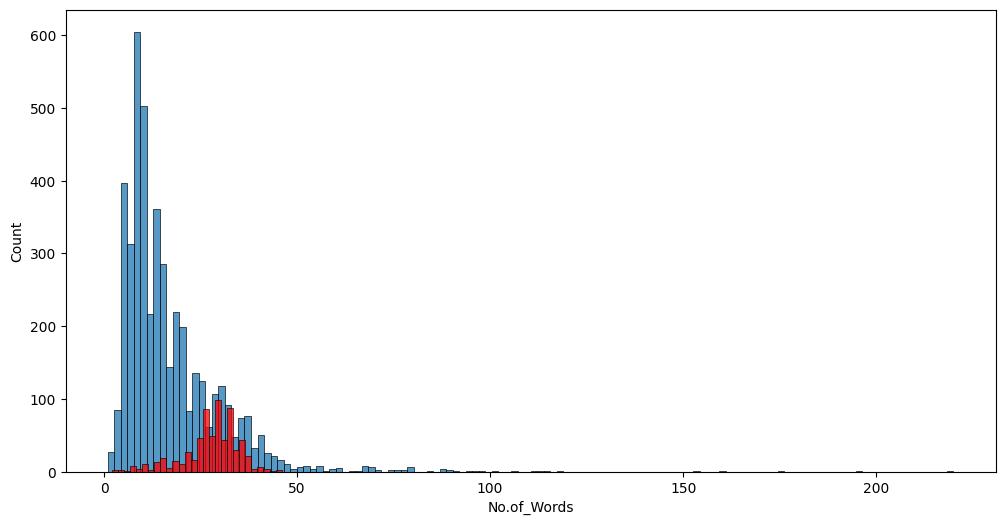

In [35]:
# Histogram of no. of words by category
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['No.of_Words'])
sns.histplot(df[df['Category'] == 1]['No.of_Words'],color='red')

<Axes: xlabel='No.of_Sentences', ylabel='Count'>

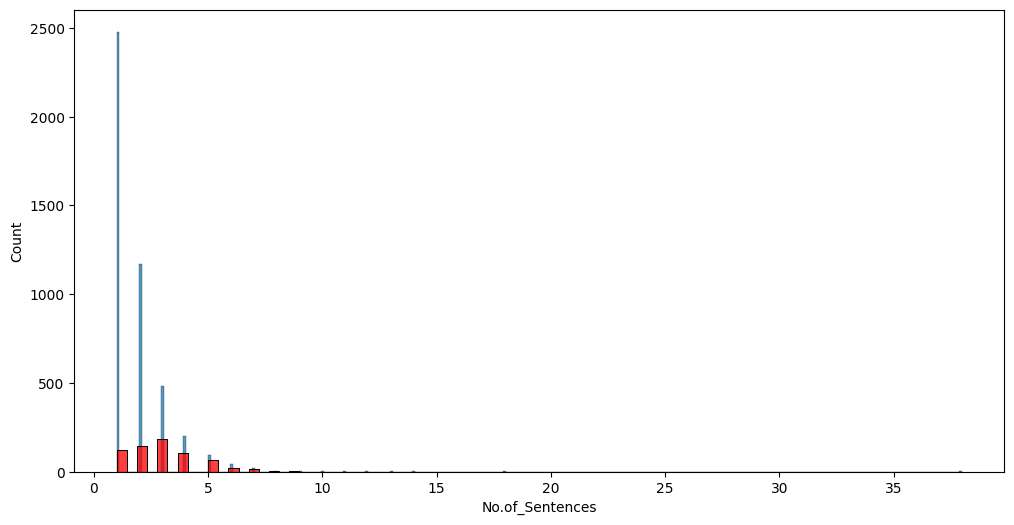

In [36]:
#  Histogram of no. of sentence by category
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['No.of_Sentences'])
sns.histplot(df[df['Category'] == 1]['No.of_Sentences'],color='red')

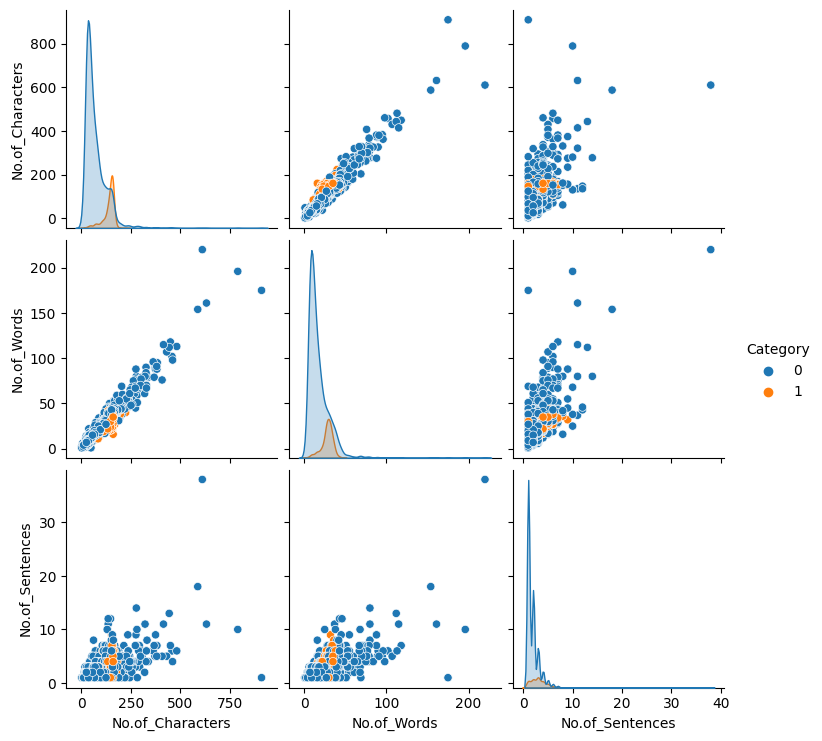

In [37]:
# Plotting a pair Plot
sns.pairplot(df,hue='Category')

<ipython-input-38-bdac3c37265b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

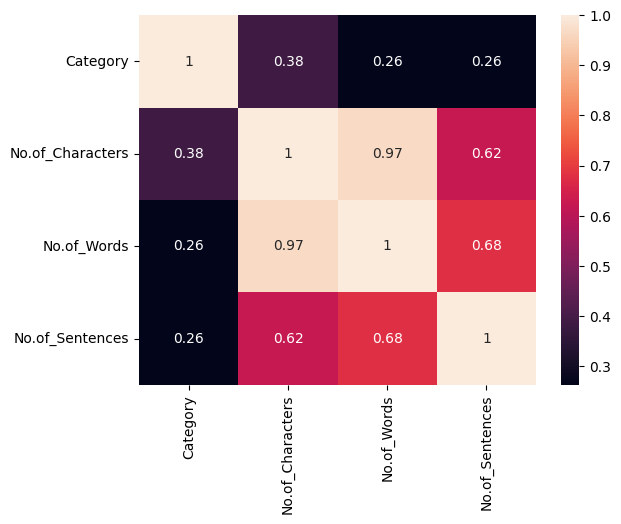

In [38]:
# Heat Map
sns.heatmap(df.corr(),annot=True)

### **Building the model**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
x = tfidf.fit_transform(df['MessageContent']).toarray()

In [41]:
y = df['Category'].values

TRAIN-TEST SPLIT

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
print(x_train.shape)

(4135, 3000)


In [44]:
print(y_train.shape)

(4135,)


In [45]:
print(x_test.shape)

(1034, 3000)


In [46]:
print(y_test.shape)

(1034,)


**Multinomial Naive Bayes Model**

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,prediction)
classification_rep = classification_report(y_test,prediction)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Multinomial NB
Accuracy score: 0.9738878143133463
Precision score: 1.0
Confusion Matrix:
[[896   0]
 [ 27 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



**Bernoulli Naive Bayes Model**

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,prediction)
classification_rep = classification_report(y_test,prediction)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Multinomial NB
Accuracy score: 0.9845261121856866
Precision score: 0.9765625
Confusion Matrix:
[[893   3]
 [ 13 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       896
           1       0.98      0.91      0.94       138

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.97      1034
weighted avg       0.98      0.98      0.98      1034



**Gaussian Naive Bayes Model**

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(x_train, y_train)

prediction = gaussian_nb_model.predict(x_test)
conf_matrix = confusion_matrix(y_test,prediction)
classification_rep = classification_report(y_test,prediction)

print("Gaussian NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Gaussian NB
Accuracy score: 0.8965183752417795
Precision score: 0.5756097560975609
Confusion Matrix:
[[809  87]
 [ 20 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       896
           1       0.58      0.86      0.69       138

    accuracy                           0.90      1034
   macro avg       0.78      0.88      0.81      1034
weighted avg       0.92      0.90      0.90      1034



**Confusion Matrix Subplot for 3 Models**

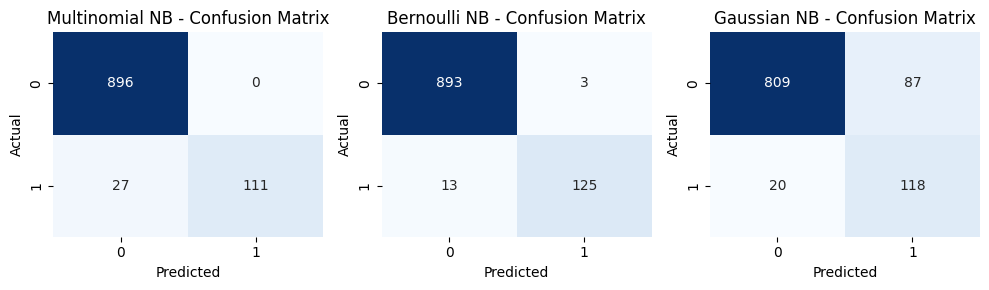

In [50]:
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("Gaussian NB", gaussian_nb_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

**Metric Comparison Heatmap**

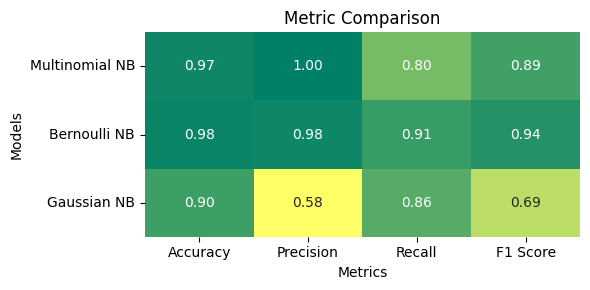

In [51]:
from sklearn.metrics import recall_score, f1_score
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=[model_name for model_name, _ in models])
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()